In [1]:
#Importing necessary library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# REAING DATA FOR COLLECTION + LOADING + PROCESSING

In [4]:
titanic_db = pd.read_csv('tested.csv')

In [5]:
#FUNCTION TO CHECK TOP 5 ROWS OF DATA

In [6]:
titanic_db.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
#TO KNOW ROWS ADD COLOMN COUNT

In [8]:
titanic_db.shape

(418, 12)

In [9]:
#TO KNOW DATA TYPE

In [10]:
titanic_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [11]:
#TO KNOW NULL VALUE

In [12]:
titanic_db.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
#REMOVE MISSING VALUES

In [14]:
titanic_db = titanic_db.drop(columns='Cabin', axis=1)

In [15]:
#REPLACE NULL VALUE WITH MEAN VALUES

In [16]:
titanic_db['Age'] = titanic_db['Age'].fillna(titanic_db['Age'].mean())

In [17]:
#AGAIN CHECKING NONE NULL VALUES

In [18]:
titanic_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [19]:
#AGAIN CHECKING COUNT OF NONE NULL VALUES

In [20]:
titanic_db.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [21]:
#FIXING NULL VALUE- FARE 

In [22]:
titanic_db['Fare'] = titanic_db['Fare'].fillna(titanic_db['Fare'].mean())

In [23]:
#CHECKED NULL VALUES AGAIN

In [24]:
titanic_db.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
#DATA CLEANING IS DONE...........

In [26]:
#CHECKING DATA BY ANALYSING THE DATA

In [27]:
titanic_db.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [28]:
#CHECKING SEX COUNT

In [29]:
titanic_db['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [30]:
#DATA VISUALISATION

In [31]:
sns.set()

In [32]:
#ANALISING DATA ON GENDER

<Axes: xlabel='Sex', ylabel='count'>

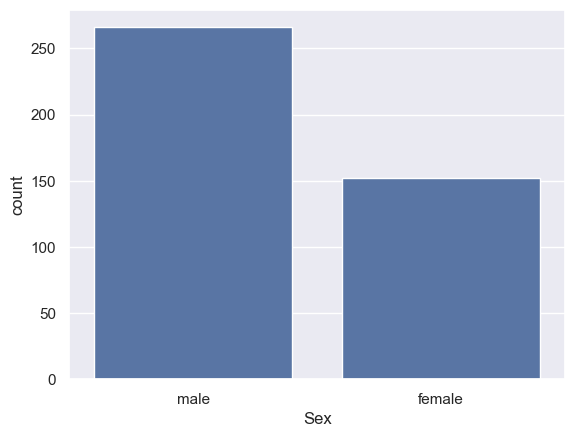

In [33]:
sns.countplot(x='Sex', data=titanic_db)

In [34]:
#SURVIVAL BASIS SEX - ON COLOR GRAPH

<Axes: xlabel='Sex', ylabel='count'>

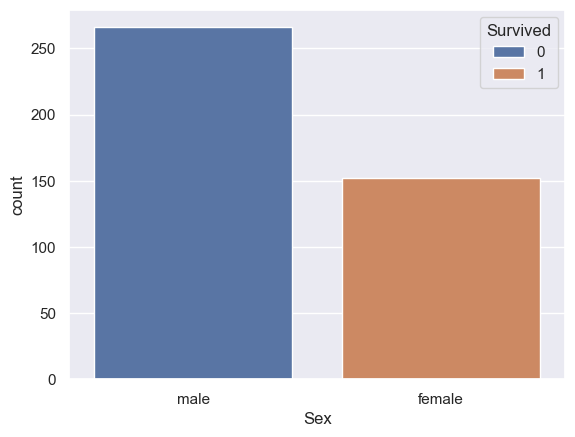

In [35]:
sns.countplot(x='Sex', hue='Survived', data=titanic_db)

In [36]:
#PCLASS CLASS BASE DATA

<Axes: xlabel='Pclass', ylabel='count'>

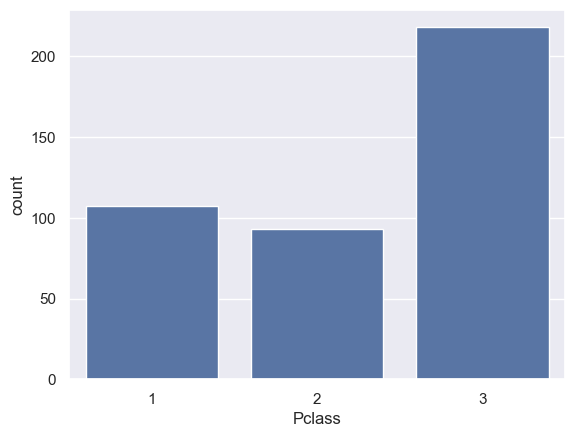

In [37]:
sns.countplot(x='Pclass', data=titanic_db)

In [38]:
#PLCASS SURVIVAL - ON COLOR GRAPH

<Axes: xlabel='Pclass', ylabel='count'>

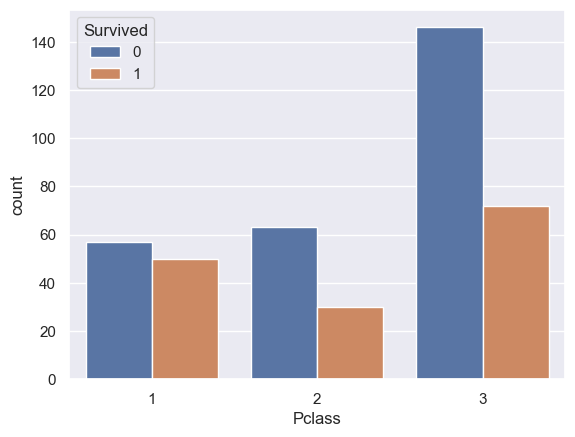

In [39]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_db)

ENCODING PART

In [40]:
titanic_db['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [41]:
titanic_db['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [42]:
# Replace values in 'Sex' and 'Embarked' columns

In [43]:
titanic_db.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True )

In [44]:
#ASSINGING VALUES TO X AND Y

In [45]:
X = titanic_db.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y = titanic_db['Survived']

In [46]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [47]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [48]:
#SPLIT

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [50]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


In [51]:
#LOGISTICAL REGRESSION AND MODEL TRAINING

In [52]:
model = LogisticRegression()

In [53]:
model.fit(X_train, Y_train)

LogisticRegression()

In [54]:
X_train_pred = model.predict(X_train)

In [55]:
print(X_train_pred)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [56]:
training_data_accuracy = accuracy_score(Y_train, X_train_pred)

In [57]:
print('Accuracy of data : ',training_data_accuracy)

Accuracy of data :  1.0


In [58]:
#THE END................